# **Data Cleaing and Processing**     

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

---
---
---

# Importing and cleaning  data

## **"niftyvix"** 

In [2]:
df0 = pd.read_csv("MacroData/fniftyvix_data.csv")
niftyvix = df0.copy()


In [3]:
# niftyvix = niftyvix.rename(columns={'Date.1': 'Date'})
niftyvix = niftyvix.drop("Date.1", axis=1)
# niftyvix['Date.1'] = niftyvix['Date']
# niftyvix.set_index('Date.1', inplace=True)
niftyvix['Date'] =  pd.to_datetime(niftyvix['Date'])
niftyvix.info()
niftyvix.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4016 non-null   datetime64[ns]
 1   vixPrice       4016 non-null   float64       
 2   vixChange%     4016 non-null   float64       
 3   niftyPrice     4016 non-null   float64       
 4   niftyChange %  4016 non-null   float64       
 5   n5day          4016 non-null   float64       
 6   n10day         4016 non-null   float64       
 7   n20day         4016 non-null   float64       
 8   n1day          4016 non-null   float64       
 9   n60day         4016 non-null   float64       
 10  nc5day         4016 non-null   float64       
 11  nc10day        4016 non-null   float64       
 12  nc20day        4016 non-null   float64       
 13  nc1day         4016 non-null   float64       
 14  nc60day        4016 non-null   float64       
 15  v5day          4016 n

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,December,January,February,n1day%,n5day%,n10day%,n20day%,n60day%,cluster,Month
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.5,4647.0,4864.25,...,0,0,0,-0.640375,3.385754,7.451437,9.804467,4.004747,2,6


## Above dataframe will be used as a template to clean and process data

> Dates must be in ascending order, hence DFs are being reciprocaled as necessary

> All date formats are being matched with "niftyvix" DF

> Copy of each orignal df is being made so that it stays safe

> All dates are changed from object to datetime format

---

## **"Gold"** 

In [4]:
df1 = pd.read_csv("MacroData/Gold.csv")
gold = df1.copy()
gold.head()

,Date,GoldPrice,GoldOpen,GoldHigh,GoldLow,Vol.,GoldChange %
0,27-08-2024,"2,529.30","2,530.50","2,537.70","2,515.40",7.27K,-0.08%
1,26-08-2024,"2,531.40","2,522.10","2,538.90","2,520.70",6.08K,0.35%
2,23-08-2024,"2,522.60","2,497.20","2,530.40","2,497.00",6.90K,1.17%
3,22-08-2024,"2,493.50","2,525.30","2,528.00","2,483.20",7.69K,-1.21%
4,21-08-2024,"2,524.10","2,528.90","2,534.00","2,505.60",5.72K,-0.13%


Dropping unecesssary columns

In [5]:
gold = gold[['Date','GoldPrice','GoldChange %']]
gold.head()

,Date,GoldPrice,GoldChange %
0,27-08-2024,"2,529.30",-0.08%
1,26-08-2024,"2,531.40",0.35%
2,23-08-2024,"2,522.60",1.17%
3,22-08-2024,"2,493.50",-1.21%
4,21-08-2024,"2,524.10",-0.13%


change columns to right data type

In [6]:
gold['Date']=pd.to_datetime(gold['Date'])

gold['GoldPrice']=gold['GoldPrice'].astype(str).str.replace(',','')
gold['GoldPrice']=gold['GoldPrice'].astype(float)

gold['GoldChange %']=gold['GoldChange %'].astype(str).str.replace("%","")
gold['GoldChange %']=gold['GoldChange %'].astype(float)

# gold['Date'] =  pd.to_datetime(gold['Date'])

gold.info()
gold

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4202 non-null   datetime64[ns]
 1   GoldPrice     4202 non-null   float64       
 2   GoldChange %  4202 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 98.6 KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_1728\1700787080.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gold['Date']=pd.to_datetime(gold['Date'])


,Date,GoldPrice,GoldChange %
0,2024-08-27,2529.3,-0.08
1,2024-08-26,2531.4,0.35
2,2024-08-23,2522.6,1.17
3,2024-08-22,2493.5,-1.21
4,2024-08-21,2524.1,-0.13
...,...,...,...
4197,2008-03-10,971.8,-0.25
4198,2008-03-07,974.2,-0.30
4199,2008-03-06,977.1,-1.15
4200,2008-03-05,988.5,2.30


Date i.e, index is not in accending order so we will correct it 

In [7]:
gold = gold.iloc[::-1].reset_index(drop=True)
gold.head()

,Date,GoldPrice,GoldChange %
0,2008-03-04,966.3,-1.82
1,2008-03-05,988.5,2.30
2,2008-03-06,977.1,-1.15
3,2008-03-07,974.2,-0.30
4,2008-03-10,971.8,-0.25


---

## **Crude Oil**

In [8]:
df2 = pd.read_csv("MacroData/Crudeoil.csv")
crude = df2.copy()
crude.head()

,Date,CrudePrice,CrudeOpen,CrudeHigh,CrudeLow,Vol.,CrudeChange %
0,03/04/2008,99.52,102.35,103.33,98.87,366.72K,-2.86%
1,03/05/2008,104.52,99.88,104.95,99.55,414.31K,5.02%
2,03/06/2008,105.47,104.64,105.97,102.85,337.77K,0.91%
3,03/07/2008,105.15,105.58,106.54,103.91,292.40K,-0.30%
4,03/10/2008,107.90,105.25,108.21,104.08,340.55K,2.62%


Dropping uncessecary columns

In [9]:
crude = crude[["Date","CrudePrice","CrudeChange %"]]

Changing columns to right datatype

In [10]:
crude['Date']=pd.to_datetime(crude['Date'])

crude['CrudePrice']=crude['CrudePrice'].astype(str).str.replace(',','')
crude['CrudePrice']=crude['CrudePrice'].astype(float)

crude['CrudeChange %']=crude['CrudeChange %'].astype(str).str.replace("%","")
crude['CrudeChange %']=crude['CrudeChange %'].astype(float)

crude.info()
crude

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4281 non-null   datetime64[ns]
 1   CrudePrice     4281 non-null   float64       
 2   CrudeChange %  4281 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 100.5 KB


,Date,CrudePrice,CrudeChange %
0,2008-03-04,99.52,-2.86
1,2008-03-05,104.52,5.02
2,2008-03-06,105.47,0.91
3,2008-03-07,105.15,-0.30
4,2008-03-10,107.90,2.62
...,...,...,...
4276,2024-08-21,71.30,-2.56
4277,2024-08-22,72.28,1.37
4278,2024-08-23,73.93,2.28
4279,2024-08-26,76.17,3.03


---

## **USDINR**

In [11]:
df3 = pd.read_csv("MacroData/usdinr.csv")
usdinr = df3.copy()
usdinr.head()

,Date,inrPrice,inrOpen,inrHigh,inrLow,Vol.,inrChange %
0,08/27/2024,83.910,83.865,83.950,83.865,NaN,0.08%
1,08/26/2024,83.840,83.801,83.910,83.776,NaN,0.04%
2,08/23/2024,83.809,83.913,83.933,83.778,NaN,-0.14%
3,08/22/2024,83.930,83.895,83.965,83.876,NaN,0.07%
4,08/21/2024,83.870,83.791,83.935,83.726,NaN,0.14%


Dropping uncessecary columns

In [12]:
usdinr = usdinr[["Date","inrPrice","inrChange %"]]

Changing columns to right datatype

In [13]:
usdinr['Date']=pd.to_datetime(usdinr['Date'])

usdinr['inrPrice']=usdinr['inrPrice'].astype(str).str.replace(',','')
usdinr['inrPrice']=usdinr['inrPrice'].astype(float)

usdinr['inrChange %']=usdinr['inrChange %'].astype(str).str.replace("%","")
usdinr['inrChange %']=usdinr['inrChange %'].astype(float)

usdinr.info()
usdinr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4301 non-null   datetime64[ns]
 1   inrPrice     4301 non-null   float64       
 2   inrChange %  4301 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 100.9 KB


,Date,inrPrice,inrChange %
0,2024-08-27,83.910,0.08
1,2024-08-26,83.840,0.04
2,2024-08-23,83.809,-0.14
3,2024-08-22,83.930,0.07
4,2024-08-21,83.870,0.14
...,...,...,...
4296,2008-03-10,40.400,-0.07
4297,2008-03-07,40.430,0.72
4298,2008-03-06,40.140,-0.15
4299,2008-03-05,40.200,-0.05


Date is not accending

In [14]:
usdinr = usdinr.iloc[::-1].reset_index(drop=True)
usdinr.head()

,Date,inrPrice,inrChange %
0,2008-03-04,40.22,-0.16
1,2008-03-05,40.20,-0.05
2,2008-03-06,40.14,-0.15
3,2008-03-07,40.43,0.72
4,2008-03-10,40.40,-0.07


---

## **"US Dollar Index"**

In [15]:
df4 = pd.read_csv("MacroData/USdollarindex.csv")
usdindex = df4.copy()
usdindex.head()

,Date,diPrice,diOpen,diHigh,diLow,Vol.,diChange %
0,27-08-2024,100.55,100.82,100.93,100.51,NaN,-0.30%
1,26-08-2024,100.85,100.68,100.92,100.53,NaN,0.13%
2,23-08-2024,100.72,101.46,101.55,100.60,NaN,-0.78%
3,22-08-2024,101.51,101.13,101.63,101.09,NaN,0.46%
4,21-08-2024,101.04,101.35,101.63,100.92,NaN,-0.40%


Dropping uncessecary columns

In [16]:
usdindex = usdindex[["Date","diPrice","diChange %"]]

Changing columns to right datatype

In [17]:
usdindex['Date']=pd.to_datetime(usdindex['Date'])

usdindex['diPrice']=usdindex['diPrice'].astype(str).str.replace(',','')
usdindex['diPrice']=usdindex['diPrice'].astype(float)

usdindex['diChange %']=usdindex['diChange %'].astype(str).str.replace("%","")
usdindex['diChange %']=usdindex['diChange %'].astype(float)

usdindex.info()
usdindex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4298 non-null   datetime64[ns]
 1   diPrice     4298 non-null   float64       
 2   diChange %  4298 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 100.9 KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_1728\2305087138.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  usdindex['Date']=pd.to_datetime(usdindex['Date'])


,Date,diPrice,diChange %
0,2024-08-27,100.55,-0.30
1,2024-08-26,100.85,0.13
2,2024-08-23,100.72,-0.78
3,2024-08-22,101.51,0.46
4,2024-08-21,101.04,-0.40
...,...,...,...
4293,2008-03-10,72.99,-0.05
4294,2008-03-07,73.03,0.04
4295,2008-03-06,73.00,-0.65
4296,2008-03-05,73.48,-0.24


Date is not accending

In [18]:
usdindex = usdindex.iloc[::-1].reset_index(drop=True)
usdindex.head()

,Date,diPrice,diChange %
0,2008-03-04,73.66,-0.05
1,2008-03-05,73.48,-0.24
2,2008-03-06,73.00,-0.65
3,2008-03-07,73.03,0.04
4,2008-03-10,72.99,-0.05


---

## **10-2year bond yeild**  

In [19]:
df5 = pd.read_csv("MacroData/10-2year.csv")

In [20]:
df5["Date"] = pd.to_datetime(df5['Date'])
df5.info()
df5.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4301 non-null   datetime64[ns]
 1   T10Y2Y  4301 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 67.3+ KB


,Date,T10Y2Y
0,2008-03-04,1.98
1,2008-03-05,2.04
2,2008-03-06,2.09
3,2008-03-07,2.03
4,2008-03-10,1.99
5,2008-03-11,1.86
6,2008-03-12,1.86
7,2008-03-13,1.93
8,2008-03-14,1.97
9,2008-03-17,1.99


converting **T10Y2Y** column from object type to float

In [21]:
# df5["T10Y2Y"] = df5['T10Y2Y'].astype(float)

# df5.info()

> it gives an error 

ValueError: could not convert string to float: "."

There may be multiple '.' values in the column let us convert them to NaN


In [22]:
df5['T10Y2Y']=df5['T10Y2Y'].replace(".", np.nan)

"." is converted to NaN successfully. 



In [23]:
df5[12:14]

,Date,T10Y2Y
12,2008-03-20,1.75
13,2008-03-21,NaN


Now we will fill the NaN values with preceding values and check if it's working

In [24]:
df5['T10Y2Y'] = df5['T10Y2Y'].fillna(method='ffill')    # method = "ffill" fills NaN values with previous values

C:\Users\Asus\AppData\Local\Temp\ipykernel_1728\1687390286.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df5['T10Y2Y'] = df5['T10Y2Y'].fillna(method='ffill')    # method = "ffill" fills NaN values with previous values


Checking if any NaN values are left

In [25]:
print(df5['T10Y2Y'].isna().sum())  


0


All NaN values are filled with preceding values succcessfully

In [26]:
df5["T10Y2Y"] = df5['T10Y2Y'].astype(float)

In [27]:
df5[12:14]

,Date,T10Y2Y
12,2008-03-20,1.75
13,2008-03-21,1.75


Adding **"percent change"** as a feature

In [28]:
df5['T10Y2Y%chng'] = df5['T10Y2Y'].pct_change() * 100
T10Y2Ydf = df5.copy()
T10Y2Ydf['Date'] =  pd.to_datetime(T10Y2Ydf['Date'])
T10Y2Ydf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4301 non-null   datetime64[ns]
 1   T10Y2Y       4301 non-null   float64       
 2   T10Y2Y%chng  4298 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 100.9 KB


In [29]:
T10Y2Ydf.head()

,Date,T10Y2Y,T10Y2Y%chng
0,2008-03-04,1.98,NaN
1,2008-03-05,2.04,3.030303
2,2008-03-06,2.09,2.450980
3,2008-03-07,2.03,-2.870813
4,2008-03-10,1.99,-1.970443


There is a NaN value in first row, we will make it zero

In [30]:
T10Y2Ydf["T10Y2Y%chng"] = T10Y2Ydf['T10Y2Y%chng'].fillna('0').astype(float)
T10Y2Ydf

,Date,T10Y2Y,T10Y2Y%chng
0,2008-03-04,1.98,0.000000
1,2008-03-05,2.04,3.030303
2,2008-03-06,2.09,2.450980
3,2008-03-07,2.03,-2.870813
4,2008-03-10,1.99,-1.970443
...,...,...,...
4296,2024-08-21,-0.13,-23.529412
4297,2024-08-22,-0.13,0.000000
4298,2024-08-23,-0.09,-30.769231
4299,2024-08-26,-0.09,0.000000


In [31]:
T10Y2Ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4301 non-null   datetime64[ns]
 1   T10Y2Y       4301 non-null   float64       
 2   T10Y2Y%chng  4301 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 100.9 KB


---

## **SnP500**

In [32]:
dfa = pd.read_csv("MacroData/S&P500.csv")
SnP500 = pd.DataFrame()
SnP500[['Date','SnP500Price','SnP500Change %']] = dfa[['Date','Price','Change %']]

SnP500['Date']=pd.to_datetime(SnP500['Date'])

SnP500['SnP500Price']=SnP500['SnP500Price'].astype(str).str.replace(',','')
SnP500['SnP500Price']=SnP500['SnP500Price'].astype(float)

SnP500['SnP500Change %']=SnP500['SnP500Change %'].astype(str).str.replace("%","")
SnP500['SnP500Change %']=SnP500['SnP500Change %'].astype(float)

SnP500.info()
SnP500.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4107 non-null   datetime64[ns]
 1   SnP500Price     4107 non-null   float64       
 2   SnP500Change %  4107 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 96.4 KB


,Date,SnP500Price,SnP500Change %
0,2024-09-27,5738.17,-0.13
1,2024-09-26,5745.37,0.40
2,2024-09-25,5722.26,-0.19
3,2024-09-24,5732.93,0.25
4,2024-09-23,5718.57,0.28


---
---

# **Joining all DFs** 
> Now we will join all above DFs togather priortising the Dates of "niftyvix" DataFrame

## Working DFs with **Non-Daily** frequency

Merge each DataFrame one by one, ensuring 'Date' index is maintained

In [33]:
daily_df = niftyvix
daily_df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,December,January,February,n1day%,n5day%,n10day%,n20day%,n60day%,cluster,Month
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,0,0,-0.640375,3.385754,7.451437,9.804467,4.004747,2,6
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,0,0,2.882579,5.235749,6.887722,9.808116,6.344267,2,6
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,0,0,4.636799,5.302214,8.311579,10.701074,6.013175,2,6
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,0,0,6.680076,5.980044,9.213897,12.648883,7.879006,2,6
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,0,0,4.629057,1.370590,8.726457,9.598550,7.566982,2,6


In [34]:
daily_df = pd.merge(daily_df, gold, how='left', on='Date')
daily_df.head(1)

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,February,n1day%,n5day%,n10day%,n20day%,n60day%,cluster,Month,GoldPrice,GoldChange %
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.5,4647.0,4864.25,...,0,-0.640375,3.385754,7.451437,9.804467,4.004747,2,6,875.5,-0.94


In [35]:
daily_df = pd.merge(daily_df, crude, how='left', on='Date')

In [36]:
daily_df = pd.merge(daily_df, usdinr, how='left', on='Date')

In [37]:
daily_df = pd.merge(daily_df, usdindex, how='left', on='Date')

In [38]:
daily_df = pd.merge(daily_df, T10Y2Ydf, how='left', on='Date')

In [39]:
daily_df = pd.merge(daily_df, SnP500, how='left', on='Date')

In [40]:
daily_df.head(2)

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,CrudePrice,CrudeChange %,inrPrice,inrChange %,diPrice,diChange %,T10Y2Y,T10Y2Y%chng,SnP500Price,SnP500Change %
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.5,4647.0,4864.25,...,127.79,4.49,42.835,0.53,73.04,-0.52,1.54,1.986755,1404.0,1.95
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.7,4761.2,4921.40,...,138.54,8.41,42.665,-0.40,72.39,-0.89,1.54,0.000000,1360.7,-3.08


There are null values in GOLD data so we will fix it 

In [41]:
daily_df.ffill(inplace=True)


In [42]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4016 non-null   datetime64[ns]
 1   vixPrice        4016 non-null   float64       
 2   vixChange%      4016 non-null   float64       
 3   niftyPrice      4016 non-null   float64       
 4   niftyChange %   4016 non-null   float64       
 5   n5day           4016 non-null   float64       
 6   n10day          4016 non-null   float64       
 7   n20day          4016 non-null   float64       
 8   n1day           4016 non-null   float64       
 9   n60day          4016 non-null   float64       
 10  nc5day          4016 non-null   float64       
 11  nc10day         4016 non-null   float64       
 12  nc20day         4016 non-null   float64       
 13  nc1day          4016 non-null   float64       
 14  nc60day         4016 non-null   float64       
 15  v5da

---

all the DataFrames above were with daily frequency, Now below we will deal with the DataFrames that were not in daily frequency 

### **Fed Interest Rate**

In [43]:
df6 = pd.read_csv("MacroData/Fedinterest.csv")
fedinterest = df6.copy()
fedinterest["Date"] = pd.to_datetime(fedinterest['Date'])
fedinterest.info()
fedinterest.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         69 non-null     datetime64[ns]
 1   Fedinterest  69 non-null     float64       
 2   Fed%change   69 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.7 KB


,Date,Fedinterest,Fed%change
0,2008-06-12,8.0,0.00
1,2008-06-25,8.5,6.25


In [44]:
daily_df = pd.merge(daily_df, fedinterest, how='left', on='Date')
daily_df.ffill(inplace=True)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4016 non-null   datetime64[ns]
 1   vixPrice        4016 non-null   float64       
 2   vixChange%      4016 non-null   float64       
 3   niftyPrice      4016 non-null   float64       
 4   niftyChange %   4016 non-null   float64       
 5   n5day           4016 non-null   float64       
 6   n10day          4016 non-null   float64       
 7   n20day          4016 non-null   float64       
 8   n1day           4016 non-null   float64       
 9   n60day          4016 non-null   float64       
 10  nc5day          4016 non-null   float64       
 11  nc10day         4016 non-null   float64       
 12  nc20day         4016 non-null   float64       
 13  nc1day          4016 non-null   float64       
 14  nc60day         4016 non-null   float64       
 15  v5da

#### Function for feature generation
* Takes a DataFrame column as input and returns a new column that resets its counter (0, 1, 2, ...) whenever the value in the input column changes.

In [45]:
def create_reset_counter(input_column):
    group = (input_column != input_column.shift()).cumsum()
    return input_column.groupby(group).cumcount()


Adding Anticepation Feature

In [46]:

daily_df["FedinterestAnticepation"] = create_reset_counter(daily_df["Fedinterest"])
daily_df.head()


,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,inrChange %,diPrice,diChange %,T10Y2Y,T10Y2Y%chng,SnP500Price,SnP500Change %,Fedinterest,Fed%change,FedinterestAnticepation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0.53,73.04,-0.52,1.54,1.986755,1404.0,1.95,NaN,NaN,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,-0.40,72.39,-0.89,1.54,0.000000,1360.7,-3.08,NaN,NaN,0
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0.36,72.85,0.64,1.29,-16.233766,1361.8,0.08,NaN,NaN,0
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0.16,73.70,1.17,1.20,-6.976744,1358.4,-0.25,NaN,NaN,0
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,-0.38,73.21,-0.66,1.27,5.833333,1335.5,-1.69,NaN,NaN,0


---

### **RBI Interest Rate**

In [47]:
df7 = pd.read_csv("MacroData/Rbiinterest.csv")
rbiinterest = df7.copy()
rbiinterest["Date"] = pd.to_datetime(rbiinterest['Date'])
rbiinterest.info()
rbiinterest.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         69 non-null     datetime64[ns]
 1   Rbiinterest  69 non-null     float64       
 2   Rbi%change   69 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.7 KB


,Date,Rbiinterest,Rbi%change
0,2008-06-12,8.0,0.00
1,2008-06-25,8.5,6.25


In [48]:
daily_df = pd.merge(daily_df, rbiinterest, how='left', on='Date')
daily_df.ffill(inplace=True)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     4016 non-null   datetime64[ns]
 1   vixPrice                 4016 non-null   float64       
 2   vixChange%               4016 non-null   float64       
 3   niftyPrice               4016 non-null   float64       
 4   niftyChange %            4016 non-null   float64       
 5   n5day                    4016 non-null   float64       
 6   n10day                   4016 non-null   float64       
 7   n20day                   4016 non-null   float64       
 8   n1day                    4016 non-null   float64       
 9   n60day                   4016 non-null   float64       
 10  nc5day                   4016 non-null   float64       
 11  nc10day                  4016 non-null   float64       
 12  nc20day                  4016 non-

Adding Anticepation Feature

In [49]:
daily_df["RbiinterestAnticepation"] = create_reset_counter(daily_df["Rbiinterest"])
daily_df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,T10Y2Y,T10Y2Y%chng,SnP500Price,SnP500Change %,Fedinterest,Fed%change,FedinterestAnticepation,Rbiinterest,Rbi%change,RbiinterestAnticepation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,1.54,1.986755,1404.0,1.95,NaN,NaN,0,NaN,NaN,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,1.54,0.000000,1360.7,-3.08,NaN,NaN,0,NaN,NaN,0
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,1.29,-16.233766,1361.8,0.08,NaN,NaN,0,NaN,NaN,0
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,1.20,-6.976744,1358.4,-0.25,NaN,NaN,0,NaN,NaN,0
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,1.27,5.833333,1335.5,-1.69,NaN,NaN,0,NaN,NaN,0


---

### **US Inflation**

In [50]:
df8 = pd.read_csv("MacroData/USinflationdata.csv")
USinflation = df8.copy()
USinflation["Date"] = pd.to_datetime(USinflation['Date'])
USinflation.head()

,Date,USInflation Rate (%)
0,2008-03-01,7.7
1,2008-04-01,8.0
2,2008-05-01,8.1
3,2008-06-01,8.6
4,2008-07-01,9.0


adding a column that shows percentage change

In [51]:
USinflation['USInflationRate%chng'] = USinflation['USInflation Rate (%)'].pct_change() * 100 

In [52]:
USinflation['USInflationRate%chng']=USinflation['USInflationRate%chng'].fillna('0').astype(float)

In [53]:
daily_df = pd.merge(daily_df, USinflation, how='left', on='Date')
daily_df.ffill(inplace=True)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     4016 non-null   datetime64[ns]
 1   vixPrice                 4016 non-null   float64       
 2   vixChange%               4016 non-null   float64       
 3   niftyPrice               4016 non-null   float64       
 4   niftyChange %            4016 non-null   float64       
 5   n5day                    4016 non-null   float64       
 6   n10day                   4016 non-null   float64       
 7   n20day                   4016 non-null   float64       
 8   n1day                    4016 non-null   float64       
 9   n60day                   4016 non-null   float64       
 10  nc5day                   4016 non-null   float64       
 11  nc10day                  4016 non-null   float64       
 12  nc20day                  4016 non-

In [54]:
USinflation.info()
USinflation.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  198 non-null    datetime64[ns]
 1   USInflation Rate (%)  198 non-null    float64       
 2   USInflationRate%chng  198 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.8 KB


,Date,USInflation Rate (%),USInflationRate%chng
0,2008-03-01,7.7,0.000000
1,2008-04-01,8.0,3.896104


Adding Anticepation Feature

In [55]:
daily_df["USInflation Rate (%)Anticepation"] = create_reset_counter(daily_df["USInflation Rate (%)"])
daily_df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,SnP500Change %,Fedinterest,Fed%change,FedinterestAnticepation,Rbiinterest,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,1.95,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,-3.08,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0.08,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,-0.25,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,-1.69,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


---

### **India Inflation Rate**

In [56]:
df9 = pd.read_csv("MacroData/IndiaInflation.csv")
IndiaInflation = df9.copy()
IndiaInflation["Date"] = pd.to_datetime(IndiaInflation['Date'])
IndiaInflation.head()

,Date,IndiaInflationRate(%)
0,2008-03-01,7.9
1,2008-04-01,8.0
2,2008-05-01,9.1
3,2008-06-01,9.3
4,2008-07-01,11.8


In [57]:
IndiaInflation['IndiaInflationRate(%)chng'] = IndiaInflation['IndiaInflationRate(%)'].pct_change() * 100 

In [58]:
IndiaInflation['IndiaInflationRate(%)chng']=IndiaInflation['IndiaInflationRate(%)chng'].fillna('0').astype(float)

In [59]:
IndiaInflation.info()
IndiaInflation.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       198 non-null    datetime64[ns]
 1   IndiaInflationRate(%)      198 non-null    float64       
 2   IndiaInflationRate(%)chng  198 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.8 KB


,Date,IndiaInflationRate(%),IndiaInflationRate(%)chng
0,2008-03-01,7.9,0.000000
1,2008-04-01,8.0,1.265823


In [60]:
daily_df = pd.merge(daily_df, IndiaInflation, how='left', on='Date')
daily_df.ffill(inplace=True)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              4016 non-null   datetime64[ns]
 1   vixPrice                          4016 non-null   float64       
 2   vixChange%                        4016 non-null   float64       
 3   niftyPrice                        4016 non-null   float64       
 4   niftyChange %                     4016 non-null   float64       
 5   n5day                             4016 non-null   float64       
 6   n10day                            4016 non-null   float64       
 7   n20day                            4016 non-null   float64       
 8   n1day                             4016 non-null   float64       
 9   n60day                            4016 non-null   float64       
 10  nc5day                            4016 non-null 

Adding Anticepation Feature

In [61]:
daily_df["IndiaInflationRate(%)Anticepation"] = create_reset_counter(daily_df["IndiaInflationRate(%)"])
daily_df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,FedinterestAnticepation,Rbiinterest,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


### Dealing with NaN values of columns with frequencies other than "Daily"
We can observe that there are about **17** rows that are NaN in the begning of data out of **4015** entries so we can replace them with most recent available entry

>Columns with NaN values are as below

**Fedinterest,	Fed%change,	Rbiinterest,	Rbi%change,	USInflation Rate (%),	USInflationRate%chng,	IndiaInflationRate(%),	IndiaInflationRate(%)chng**

In [62]:
daily_df['Fedinterest'] = daily_df['Fedinterest'].bfill()

In [63]:
daily_df['Fed%change'] = daily_df['Fed%change'].bfill()

In [64]:
daily_df['Rbiinterest'] = daily_df['Rbiinterest'].bfill()

In [65]:
daily_df['Rbi%change'] = daily_df['Rbi%change'].bfill()

In [66]:
daily_df['USInflation Rate (%)'] = daily_df['USInflation Rate (%)'].bfill()

In [67]:
daily_df['USInflationRate%chng'] = daily_df['USInflationRate%chng'].bfill()

In [68]:
daily_df['IndiaInflationRate(%)'] = daily_df['IndiaInflationRate(%)'].bfill()

In [69]:
daily_df['IndiaInflationRate(%)chng'] = daily_df['IndiaInflationRate(%)chng'].bfill()

In [70]:
daily_df.ffill(inplace=True)
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               4016 non-null   datetime64[ns]
 1   vixPrice                           4016 non-null   float64       
 2   vixChange%                         4016 non-null   float64       
 3   niftyPrice                         4016 non-null   float64       
 4   niftyChange %                      4016 non-null   float64       
 5   n5day                              4016 non-null   float64       
 6   n10day                             4016 non-null   float64       
 7   n20day                             4016 non-null   float64       
 8   n1day                              4016 non-null   float64       
 9   n60day                             4016 non-null   float64       
 10  nc5day                             4

In [71]:
daily_df.head()

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,FedinterestAnticepation,Rbiinterest,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation
0,2008-06-05,30.32,1.68,4676.95,1.99,4835.3,5025.45,5135.50,4647.00,4864.25,...,0,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0
1,2008-06-06,30.32,0.00,4627.80,-1.05,4870.1,4946.55,5081.70,4761.20,4921.40,...,0,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0
2,2008-06-09,32.43,6.96,4500.95,-2.74,4739.6,4875.05,4982.60,4709.65,4771.60,...,0,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0
3,2008-06-10,30.23,-6.78,4449.80,-1.14,4715.9,4859.80,5012.65,4747.05,4800.40,...,0,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0
4,2008-06-11,29.64,-1.95,4523.60,1.66,4585.6,4918.35,4957.80,4733.00,4865.90,...,0,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0


## Working on DFs which have less than 20 entries 
These entries are from a duration of more than 16 years

---

### **IndianBudgetDates**

In [72]:
df10 = pd.read_csv("MacroData/IndianBudgetDates.csv")
IndianBudgetDates = df10.copy()
IndianBudgetDates["Date"] = pd.to_datetime(IndianBudgetDates['Date'])
IndianBudgetDates.head()

,Date,IndiaBudgetDatesMarker
0,2008-02-01,1
1,2009-02-01,1
2,2010-02-01,1
3,2011-02-01,1
4,2012-02-01,1


Adding above df in dialy_df and filling NaN values with 0

In [73]:
daily_df = pd.merge(daily_df, IndianBudgetDates, how='left', on='Date')
daily_df['IndiaBudgetDatesMarker'].fillna(0)
daily_df['IndiaBudgetDatesMarker'].head(4)

0   NaN
1   NaN
2   NaN
3   NaN
Name: IndiaBudgetDatesMarker, dtype: float64

Function to create **Feature** which will help machine anticepate the Indian Budget

In [74]:

def calculate_anticipation(df, marker_column, output_column):
    counter = 0
    anticipation = []

    for value in df[marker_column]:
        if value == 1:
            counter = 0  # Reset counter when marker is 1
        anticipation.append(counter)
        counter += 1

    df[output_column] = anticipation
    return df

In [75]:
calculate_anticipation(daily_df, "IndiaBudgetDatesMarker", "IndiaBudgetDatesAnticipation")

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesMarker,IndiaBudgetDatesAnticipation
0,2008-06-05,30.3200,1.68,4676.95,1.99,4835.30,5025.45,5135.50,4647.00,4864.25,...,0.0,0,9.0,4.651163,0,11.8,26.881720,0,NaN,0
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,0.0,0,9.0,4.651163,0,11.8,26.881720,0,NaN,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,0.0,0,9.0,4.651163,0,11.8,26.881720,0,NaN,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,0.0,0,9.0,4.651163,0,11.8,26.881720,0,NaN,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,0.0,0,9.0,4.651163,0,11.8,26.881720,0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2024-08-21,13.3325,-3.53,24770.20,0.29,24139.00,23992.55,24479.05,23537.85,22957.10,...,0.0,378,3.7,5.714286,13,3.7,5.714286,13,NaN,136
4012,2024-08-22,13.0000,-2.49,24811.50,0.17,24143.75,24297.50,24413.50,23721.30,22932.45,...,0.0,379,3.7,5.714286,14,3.7,5.714286,14,NaN,137
4013,2024-08-23,13.5525,4.25,24823.15,0.05,24541.15,24117.00,24406.10,23868.80,22888.15,...,0.0,380,3.7,5.714286,15,3.7,5.714286,15,NaN,138
4014,2024-08-26,13.7950,1.79,25010.60,0.76,24572.65,24367.50,24834.85,24044.50,22704.70,...,0.0,381,3.7,5.714286,16,3.7,5.714286,16,NaN,139


Values of **"IndiaBudgetDatesAnticipation" is reseting** at new budget event so we can say it's working, **now we can drop "IndiaBudgetDatesMarker"**

In [76]:
daily_df = daily_df.drop("IndiaBudgetDatesMarker", axis=1)
daily_df.info()
daily_df[1:-136]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               4016 non-null   datetime64[ns]
 1   vixPrice                           4016 non-null   float64       
 2   vixChange%                         4016 non-null   float64       
 3   niftyPrice                         4016 non-null   float64       
 4   niftyChange %                      4016 non-null   float64       
 5   n5day                              4016 non-null   float64       
 6   n10day                             4016 non-null   float64       
 7   n20day                             4016 non-null   float64       
 8   n1day                              4016 non-null   float64       
 9   n60day                             4016 non-null   float64       
 10  nc5day                             4

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,Rbiinterest,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0,4
5,2008-06-12,29.2300,-1.38,4539.35,0.35,4676.95,4835.30,5011.75,4777.80,4872.00,...,8.0,0.0,0,9.0,4.651163,0,11.8,26.88172,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,2024-02-01,14.4550,-9.92,21697.45,-0.13,21453.95,21571.95,21517.35,20855.10,19411.75,...,6.5,0.0,242,5.1,0.000000,22,5.1,0.00000,22,0
3876,2024-02-02,14.6975,1.68,21853.80,0.72,21352.60,21462.25,21658.60,20937.70,19406.70,...,6.5,0.0,243,5.1,0.000000,23,5.1,0.00000,23,1
3877,2024-02-05,15.6175,6.26,21771.70,-0.38,21737.60,21622.40,21710.80,20901.15,19443.50,...,6.5,0.0,244,5.1,0.000000,24,5.1,0.00000,24,2
3878,2024-02-06,15.7850,1.07,21929.40,0.72,21522.10,21571.80,21513.00,20969.40,19395.30,...,6.5,0.0,245,5.1,0.000000,25,5.1,0.00000,25,3


---

### **IndiaElectionDates**

In [77]:
df11 = pd.read_csv("MacroData/IndiaElectionDates.csv")
IndiaElectionDates = df11.copy()
IndiaElectionDates["Date"] = pd.to_datetime(IndiaElectionDates['Date'])
IndiaElectionDates.head()

,Date,IndiaElectionDatesMarker
0,2009-04-16,1
1,2014-04-07,1
2,2019-04-11,1


Adding above df in dialy_df and filling NaN values with 0

In [78]:
daily_df = pd.merge(daily_df, IndiaElectionDates, how='left', on='Date')
daily_df['IndiaElectionDatesMarker'].fillna(0)
daily_df['IndiaElectionDatesMarker'].head(4)

0   NaN
1   NaN
2   NaN
3   NaN
Name: IndiaElectionDatesMarker, dtype: float64

Creating and adding **"anticepation"** feature

In [79]:
calculate_anticipation(daily_df, "IndiaElectionDatesMarker", "IndiaElectionDatesAnticipation")

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesMarker,IndiaElectionDatesAnticipation
0,2008-06-05,30.3200,1.68,4676.95,1.99,4835.30,5025.45,5135.50,4647.00,4864.25,...,0,9.0,4.651163,0,11.8,26.881720,0,0,NaN,0
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,0,9.0,4.651163,0,11.8,26.881720,0,1,NaN,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,0,9.0,4.651163,0,11.8,26.881720,0,2,NaN,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,0,9.0,4.651163,0,11.8,26.881720,0,3,NaN,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,0,9.0,4.651163,0,11.8,26.881720,0,4,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2024-08-21,13.3325,-3.53,24770.20,0.29,24139.00,23992.55,24479.05,23537.85,22957.10,...,378,3.7,5.714286,13,3.7,5.714286,13,136,NaN,1325
4012,2024-08-22,13.0000,-2.49,24811.50,0.17,24143.75,24297.50,24413.50,23721.30,22932.45,...,379,3.7,5.714286,14,3.7,5.714286,14,137,NaN,1326
4013,2024-08-23,13.5525,4.25,24823.15,0.05,24541.15,24117.00,24406.10,23868.80,22888.15,...,380,3.7,5.714286,15,3.7,5.714286,15,138,NaN,1327
4014,2024-08-26,13.7950,1.79,25010.60,0.76,24572.65,24367.50,24834.85,24044.50,22704.70,...,381,3.7,5.714286,16,3.7,5.714286,16,139,NaN,1328


Checking if new feature is added correctly and droping the marker column

In [80]:
daily_df = daily_df.drop("IndiaElectionDatesMarker", axis=1)
daily_df.info()
daily_df[1:-136]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 79 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               4016 non-null   datetime64[ns]
 1   vixPrice                           4016 non-null   float64       
 2   vixChange%                         4016 non-null   float64       
 3   niftyPrice                         4016 non-null   float64       
 4   niftyChange %                      4016 non-null   float64       
 5   n5day                              4016 non-null   float64       
 6   n10day                             4016 non-null   float64       
 7   n20day                             4016 non-null   float64       
 8   n1day                              4016 non-null   float64       
 9   n60day                             4016 non-null   float64       
 10  nc5day                             4

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,Rbi%change,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesAnticipation
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,0.0,0,9.0,4.651163,0,11.8,26.88172,0,1,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,0.0,0,9.0,4.651163,0,11.8,26.88172,0,2,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,0.0,0,9.0,4.651163,0,11.8,26.88172,0,3,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,0.0,0,9.0,4.651163,0,11.8,26.88172,0,4,4
5,2008-06-12,29.2300,-1.38,4539.35,0.35,4676.95,4835.30,5011.75,4777.80,4872.00,...,0.0,0,9.0,4.651163,0,11.8,26.88172,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,2024-02-01,14.4550,-9.92,21697.45,-0.13,21453.95,21571.95,21517.35,20855.10,19411.75,...,0.0,242,5.1,0.000000,22,5.1,0.00000,22,0,1189
3876,2024-02-02,14.6975,1.68,21853.80,0.72,21352.60,21462.25,21658.60,20937.70,19406.70,...,0.0,243,5.1,0.000000,23,5.1,0.00000,23,1,1190
3877,2024-02-05,15.6175,6.26,21771.70,-0.38,21737.60,21622.40,21710.80,20901.15,19443.50,...,0.0,244,5.1,0.000000,24,5.1,0.00000,24,2,1191
3878,2024-02-06,15.7850,1.07,21929.40,0.72,21522.10,21571.80,21513.00,20969.40,19395.30,...,0.0,245,5.1,0.000000,25,5.1,0.00000,25,3,1192


---

### **UsElectionDates**

In [81]:
df12 = pd.read_csv("MacroData/UsElectionDates.csv")
UsElectionDates = df12.copy()
UsElectionDates["Date"] = pd.to_datetime(UsElectionDates['Date'])
UsElectionDates.head()

,Date,UsElectionDatesMarker
0,2008-11-04,1
1,2012-11-06,1
2,2016-11-08,1
3,2020-11-03,1


Adding above df in dialy_df and filling NaN values with 0

In [82]:
daily_df = pd.merge(daily_df, UsElectionDates, how='left', on='Date')
daily_df['UsElectionDatesMarker'].fillna(0)
daily_df['UsElectionDatesMarker'].head(4)

0   NaN
1   NaN
2   NaN
3   NaN
Name: UsElectionDatesMarker, dtype: float64

Creating and adding **"anticepation"** feature

In [83]:
calculate_anticipation(daily_df, "UsElectionDatesMarker", "UsElectionDatesAnticipation")

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesAnticipation,UsElectionDatesMarker,UsElectionDatesAnticipation
0,2008-06-05,30.3200,1.68,4676.95,1.99,4835.30,5025.45,5135.50,4647.00,4864.25,...,9.0,4.651163,0,11.8,26.881720,0,0,0,NaN,0
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,9.0,4.651163,0,11.8,26.881720,0,1,1,NaN,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,9.0,4.651163,0,11.8,26.881720,0,2,2,NaN,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,9.0,4.651163,0,11.8,26.881720,0,3,3,NaN,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,9.0,4.651163,0,11.8,26.881720,0,4,4,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2024-08-21,13.3325,-3.53,24770.20,0.29,24139.00,23992.55,24479.05,23537.85,22957.10,...,3.7,5.714286,13,3.7,5.714286,13,136,1325,NaN,940
4012,2024-08-22,13.0000,-2.49,24811.50,0.17,24143.75,24297.50,24413.50,23721.30,22932.45,...,3.7,5.714286,14,3.7,5.714286,14,137,1326,NaN,941
4013,2024-08-23,13.5525,4.25,24823.15,0.05,24541.15,24117.00,24406.10,23868.80,22888.15,...,3.7,5.714286,15,3.7,5.714286,15,138,1327,NaN,942
4014,2024-08-26,13.7950,1.79,25010.60,0.76,24572.65,24367.50,24834.85,24044.50,22704.70,...,3.7,5.714286,16,3.7,5.714286,16,139,1328,NaN,943


Checking if new feature is added correctly and droping the marker column

In [84]:
daily_df = daily_df.drop("UsElectionDatesMarker", axis=1)
daily_df.info()
daily_df[1:-941]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               4016 non-null   datetime64[ns]
 1   vixPrice                           4016 non-null   float64       
 2   vixChange%                         4016 non-null   float64       
 3   niftyPrice                         4016 non-null   float64       
 4   niftyChange %                      4016 non-null   float64       
 5   n5day                              4016 non-null   float64       
 6   n10day                             4016 non-null   float64       
 7   n20day                             4016 non-null   float64       
 8   n1day                              4016 non-null   float64       
 9   n60day                             4016 non-null   float64       
 10  nc5day                             4

,Date,vixPrice,vixChange%,niftyPrice,niftyChange %,n5day,n10day,n20day,n1day,n60day,...,RbiinterestAnticepation,USInflation Rate (%),USInflationRate%chng,USInflation Rate (%)Anticepation,IndiaInflationRate(%),IndiaInflationRate(%)chng,IndiaInflationRate(%)Anticepation,IndiaBudgetDatesAnticipation,IndiaElectionDatesAnticipation,UsElectionDatesAnticipation
1,2008-06-06,30.3200,0.00,4627.80,-1.05,4870.10,4946.55,5081.70,4761.20,4921.40,...,0,9.0,4.651163,0,11.8,26.881720,0,1,1,1
2,2008-06-09,32.4300,6.96,4500.95,-2.74,4739.60,4875.05,4982.60,4709.65,4771.60,...,0,9.0,4.651163,0,11.8,26.881720,0,2,2,2
3,2008-06-10,30.2300,-6.78,4449.80,-1.14,4715.90,4859.80,5012.65,4747.05,4800.40,...,0,9.0,4.651163,0,11.8,26.881720,0,3,3,3
4,2008-06-11,29.6400,-1.95,4523.60,1.66,4585.60,4918.35,4957.80,4733.00,4865.90,...,0,9.0,4.651163,0,11.8,26.881720,0,4,4,4
5,2008-06-12,29.2300,-1.38,4539.35,0.35,4676.95,4835.30,5011.75,4777.80,4872.00,...,0,9.0,4.651163,0,11.8,26.881720,0,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,2020-11-02,25.2100,1.85,11669.15,0.23,11767.75,11873.05,11503.35,11333.85,11214.05,...,114,7.6,4.109589,21,7.6,4.109589,21,187,384,986
3071,2020-11-03,24.2400,-3.85,11813.50,1.24,11889.40,11896.80,11662.40,11355.05,11270.15,...,115,7.6,4.109589,22,7.6,4.109589,22,188,385,0
3072,2020-11-04,23.2000,-4.29,11908.50,0.80,11729.60,11937.65,11738.85,11317.35,11322.50,...,116,7.6,4.109589,23,7.6,4.109589,23,189,386,1
3073,2020-11-05,20.9650,-9.63,12120.30,1.78,11670.80,11896.45,11834.60,11278.00,11308.40,...,117,7.6,4.109589,24,7.6,4.109589,24,190,387,2


In [85]:
daily_df.to_csv('finaldata.csv', index=False)

---
---

### Checking Seasonality

In [86]:
niftyseasonality = daily_df['niftyPrice']
# niftyseasonality.columns.values[0] = 'niftyPrice'
niftyseasonality

0        4676.95
1        4627.80
2        4500.95
3        4449.80
4        4523.60
          ...   
4011    24770.20
4012    24811.50
4013    24823.15
4014    25010.60
4015    25017.75
Name: niftyPrice, Length: 4016, dtype: float64

In [87]:
niftyseasonality.shape

(4016,)

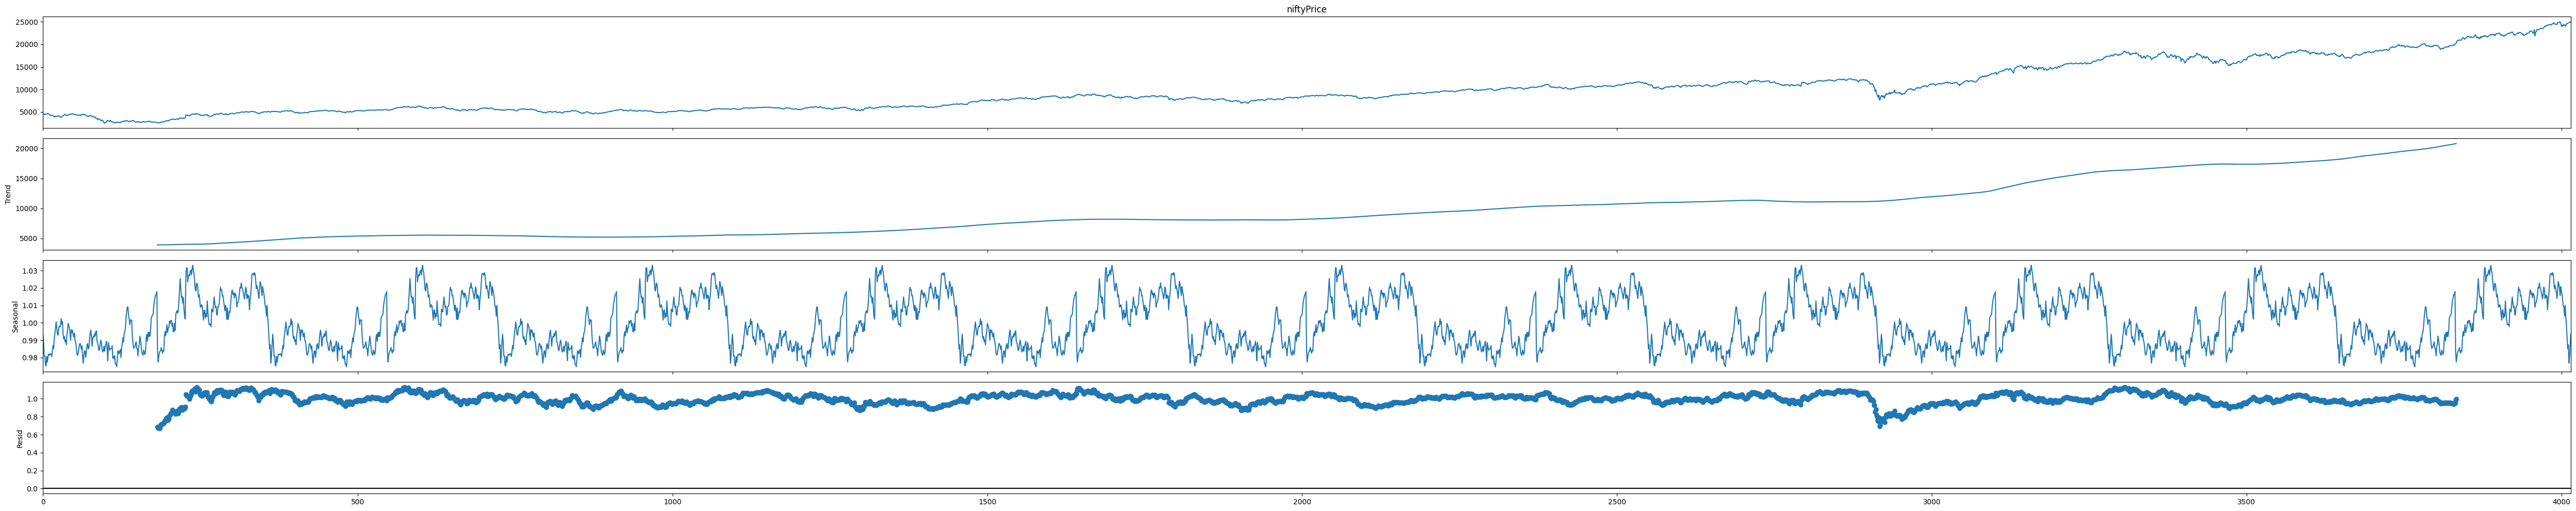

In [88]:
# # Set frequency (if not set) or manually specify a period
# niftyseasonality = niftyseasonality.asfreq('D')  # Daily frequency, adjust as needed

# Perform seasonal decomposition
result = seasonal_decompose(niftyseasonality, model='multiplicative', period=365)  # Adjust period as per your data

# Increase the graph size
plt.rcParams['figure.figsize'] = [50, 10]  # Width: 12, Height: 8 (adjust as needed)

# Plot the decomposition results
result.plot()
plt.tight_layout()
plt.show()


<Axes: >

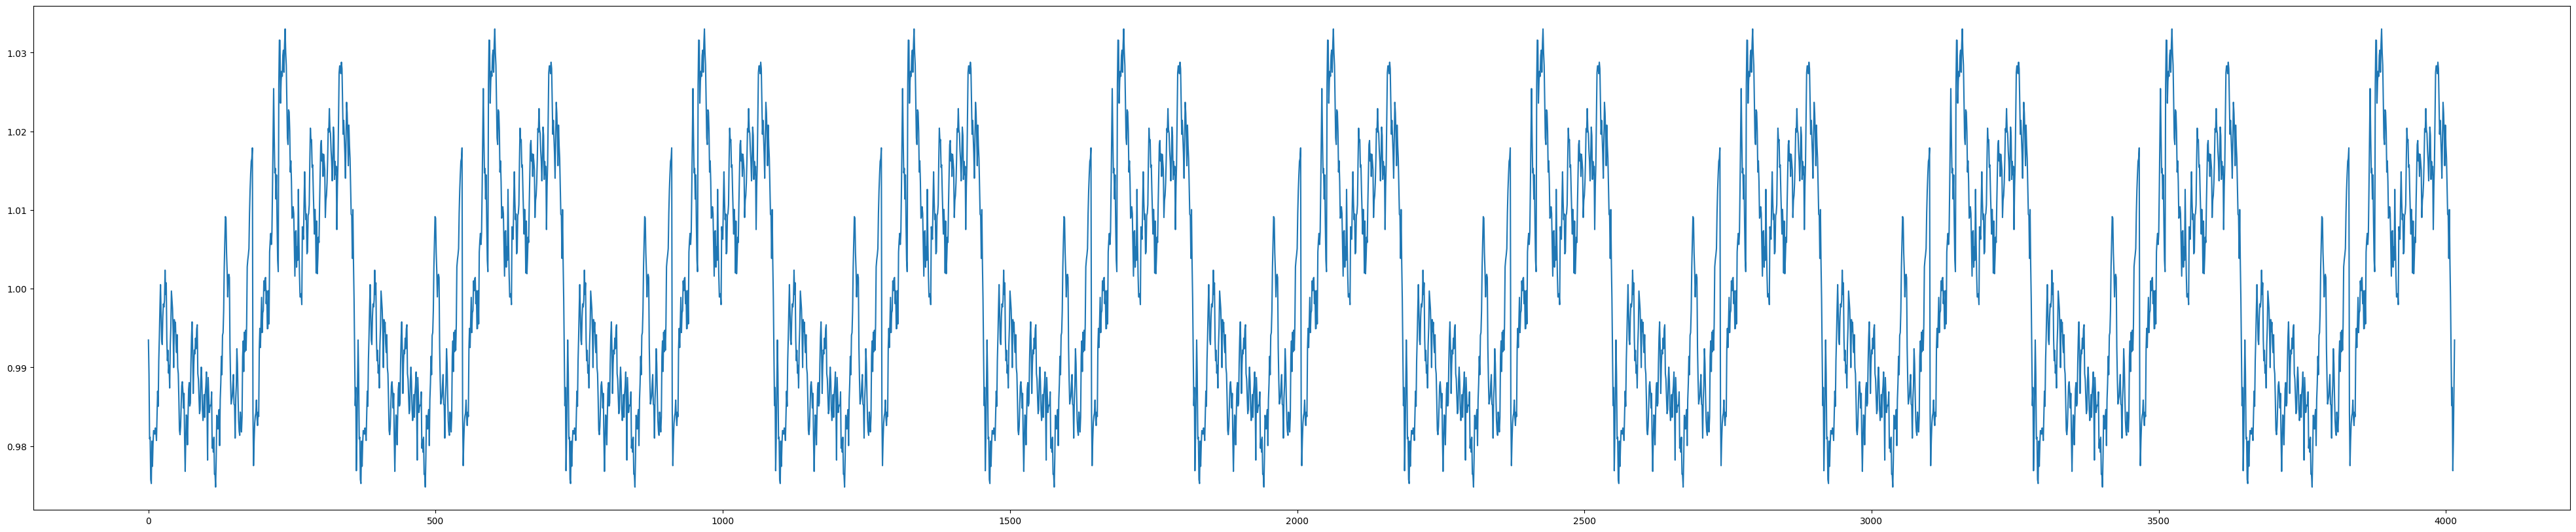

In [89]:
result.seasonal.plot()

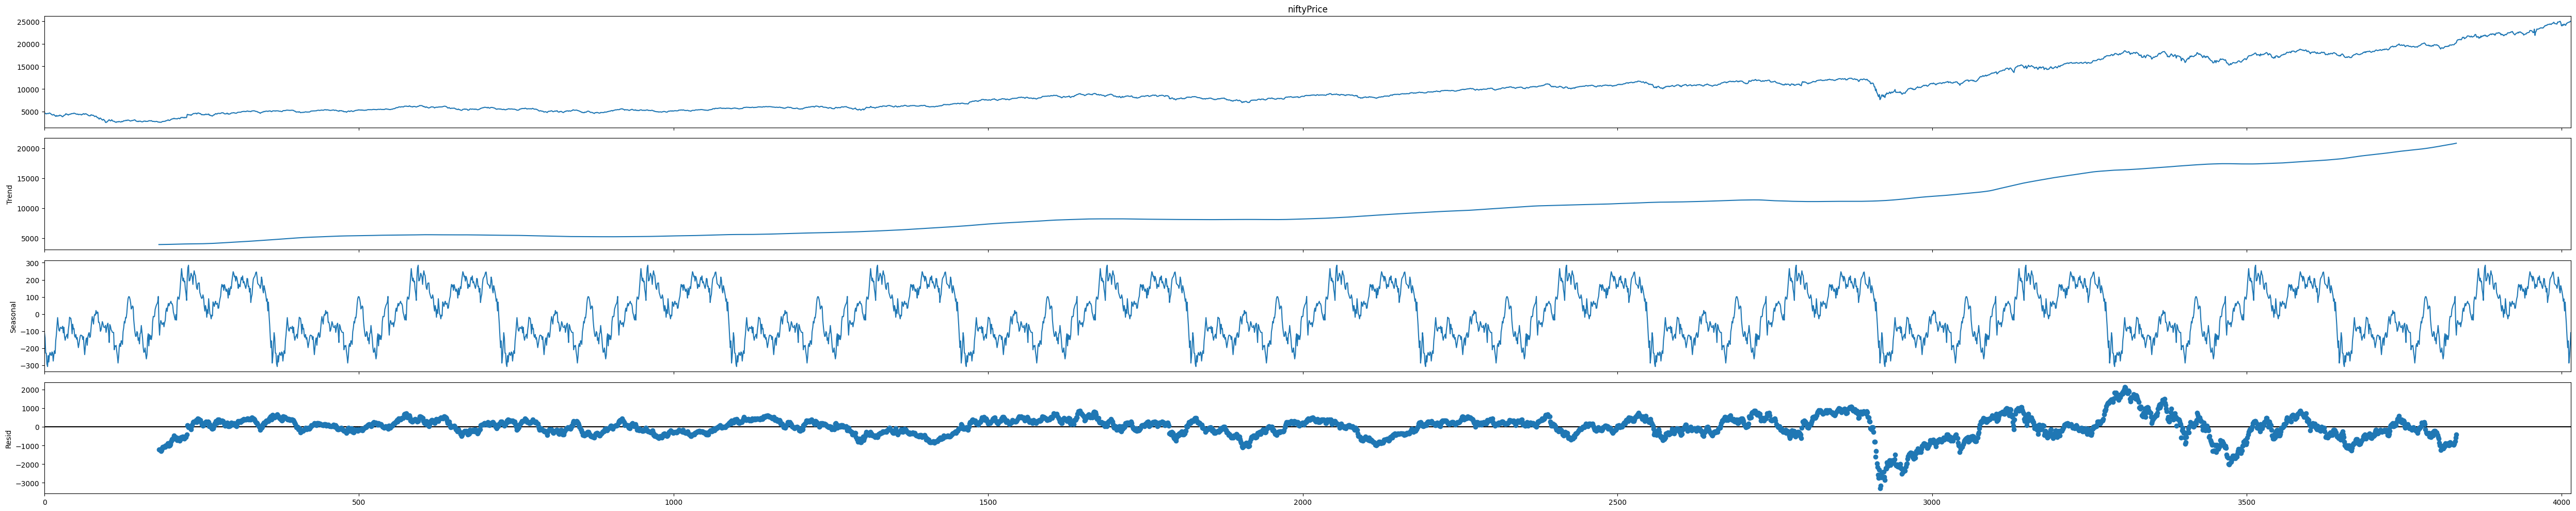

In [90]:
# # Set frequency (if not set) or manually specify a period
# niftyseasonality = niftyseasonality.asfreq('D')  # Daily frequency, adjust as needed

# Perform seasonal decomposition
result = seasonal_decompose(niftyseasonality, model='additive', period=365)  # Adjust period as per your data

# Increase the graph size
plt.rcParams['figure.figsize'] = [50, 10]

# Plot the decomposition results
result.plot()
plt.tight_layout()
plt.show()

<Axes: >

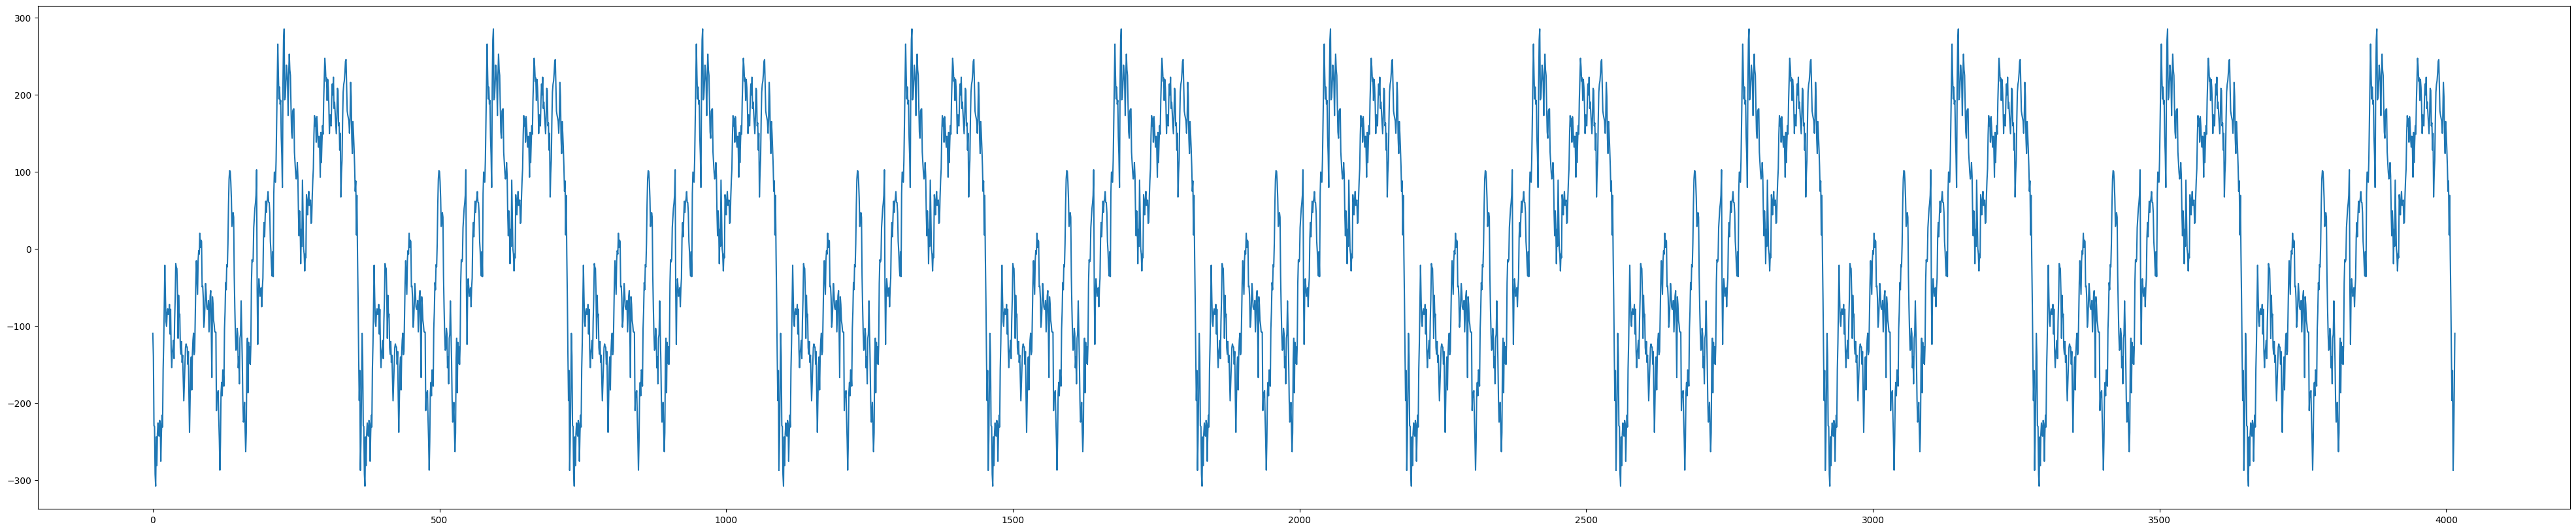

In [91]:
result.seasonal.plot()